Sơ bộ về dữ liệu: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_limit                9770 non-null   object 
 1   Gender                    10000 non-null  object 
 2   approv_in_adv             9940 non-null   object 
 3   loan_type                 10000 non-null  object 
 4   loan_purpose              9994 non-null   object 
 5   Credit_Worthiness         10000 non-null  object 
 6   open_credit               10000 non-null  object 
 7   business_or_commercial    10000 non-null  object 
 8   loan_amount               10000 non-null  int64  
 9   rate_of_interest          7527 non-null   float64
 10  Upfront_charges           7318 non-null   float64
 11  Neg_ammortization         9993 non-null   object 
 12  interest_only             10000 non-null  object 
 13  lump_sum_payment          10000 non-null  o

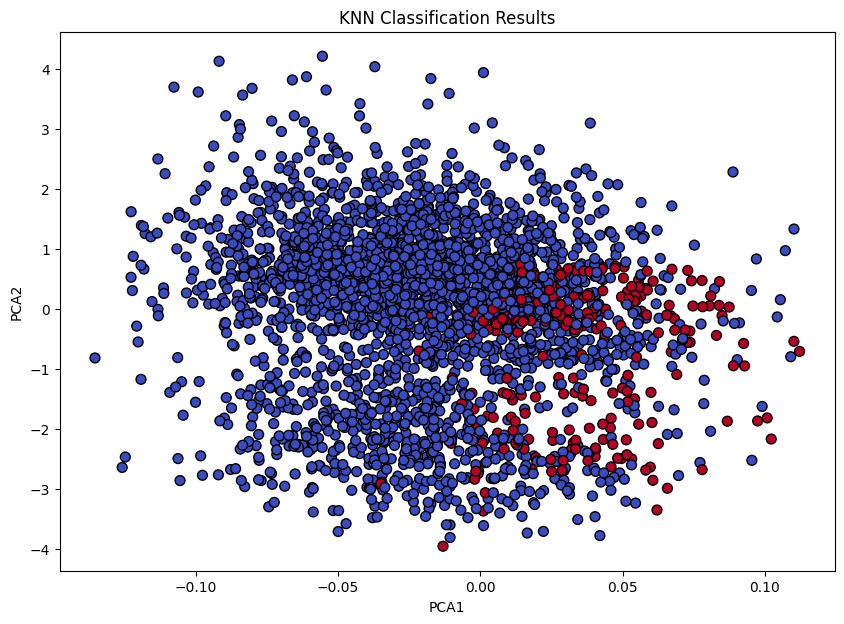

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats

def readData():
    df = pd.read_csv('Loan_Default.csv')

    x = df.drop(['ID','year','term','Interest_rate_spread','property_value','submission_of_application'], axis=1)
    x = x[:10000]
    y = df['Status']
    y = y[:10000]
    print("Sơ bộ về dữ liệu: ")
    print(x.info())
    
    oneHotEncoder = LabelEncoder()
    for i in x.columns:
        if not pd.api.types.is_numeric_dtype(x[i]):
            x[i] = oneHotEncoder.fit_transform(x[i])
    y = oneHotEncoder.fit_transform(y)

    mean_values = df.select_dtypes(include=['number']).mean()
    x = x.fillna(mean_values)
    print("Dữ liệu sau chuẩn hóa: ")
    print(x.info())
    return x, y

# Gọi hàm và lưu trữ các giá trị trả về
x, y = readData()

# Chuẩn hóa các đặc trưng
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Giảm số chiều dữ liệu xuống 2D bằng PCA (tùy chọn, không bắt buộc)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Phát hiện và loại bỏ các điểm ngoại lai
z_scores = np.abs(stats.zscore(x_pca))
threshold = 3
non_outliers = (z_scores < threshold).all(axis=1)

# Lọc dữ liệu để loại bỏ các điểm ngoại lai
x_pca_cleaned = x_pca[non_outliers]
y_cleaned = y[non_outliers]

print(f"Trước khi loại bỏ: {x_pca.shape[0]} điểm dữ liệu")
print(f"Sau khi loại bỏ: {x_pca_cleaned.shape[0]} điểm dữ liệu")

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x_pca_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Huấn luyện mô hình KNN
knn.fit(x_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = knn.predict(x_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Vẽ biểu đồ khu vực phân loại
plt.figure(figsize=(10, 7))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k', s=50)
plt.title('KNN Classification Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76
